#### Data analysis notebook

Reads in the data files and plot results



In [1]:
from RunManager import RunManager
from Geant4Analyzer import Geant4Analyzer
import matplotlib.pyplot as plt
import numpy as np


In [2]:
manager = RunManager("../run/rundb.json")
display(manager.display_all_runs(include_deleted=False))

,id,particle,ion,energy,sourceVolume,outputDir,outputFile,numEvents,numJobs,randomSeed,settingsFile,status
0,run_01,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_202646,na22,10000000,1,926572,settings.json,active
1,run_02,ion,11 22,None,,/data/xenon/acolijn/G4XamsSim/20240910_202845,na22,10000000,10,909868,settings.json,active


In [17]:
# cut on the global event variables
gxe = 0 # gaseous xenon
lxe = 1 # liquid xenon

cut = lambda data: (data['ndet'][:,lxe] > 0 ) & (data['ndet'][:,gxe] > 0)
# additional cuts on the clusters
#cut_hit = lambda data: (data['r'] < 35.) & (data['zh'] < 0.) & (data['zh']>-60.) & (data['eh'] > 0.)
cut_hit = lambda data: (data['eh'] > 0.)

std = Geant4Analyzer("run_02", first_only=True)
std.preprocess_data(cut=cut, cut_hit=cut_hit)


Loading /data/xenon/acolijn/G4XamsSim/20240910_202845/na22_9.root
Data loaded from 1 files


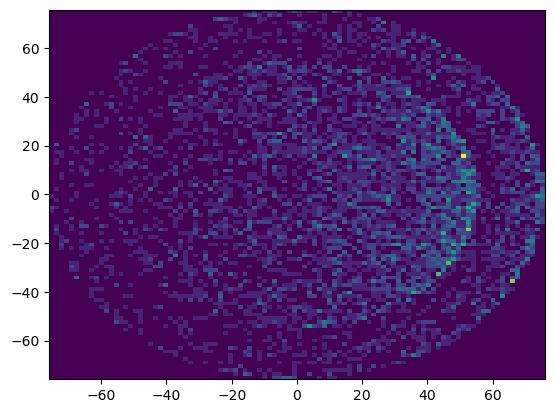

In [18]:
h = plt.hist2d(std.data['xh'], std.data['yh'], bins=100)

integral = 5450.0


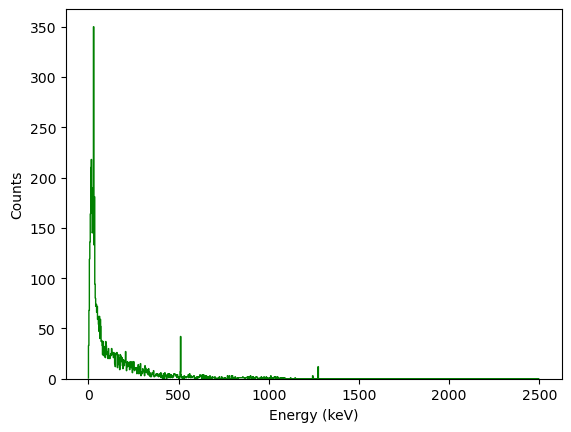

In [19]:
ax = std.plot_histogram("eh", bins=1000, range=(0, 2500), show=False)
ax.set_yscale('linear')
plt.show()

Text(0, 0.5, 'z (mm)')

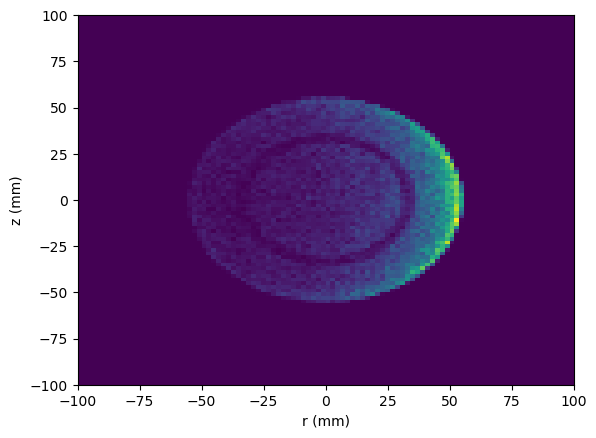

In [13]:
h2 = plt.hist2d(std.data['xh'][std.data['id']==1], std.data['yh'][std.data['id']==1], bins=100, range=((-100, 100), (-100, 100)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")

Text(0, 0.5, 'z (mm)')

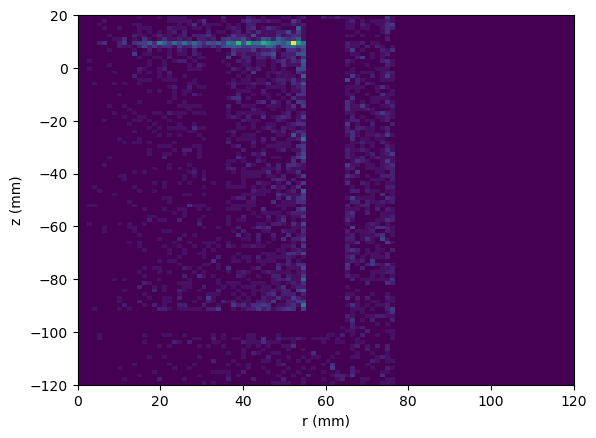

In [21]:
h2 = plt.hist2d(std.data['r'], std.data['zh'], bins=100, range=((0, 120), (-120, 20)))
plt.xlabel("r (mm)")
plt.ylabel("z (mm)")